# ivi - Interactive Visualizations

In [20]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.data import stocks

import pandas as pd
import numpy as np

In [21]:
stocks = stocks()
stocks.head(2)

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988


## Stock Price Plot

In [22]:
for col in stocks.columns[1:]:
    stocks[col] = (stocks[col] - 1) * 100    

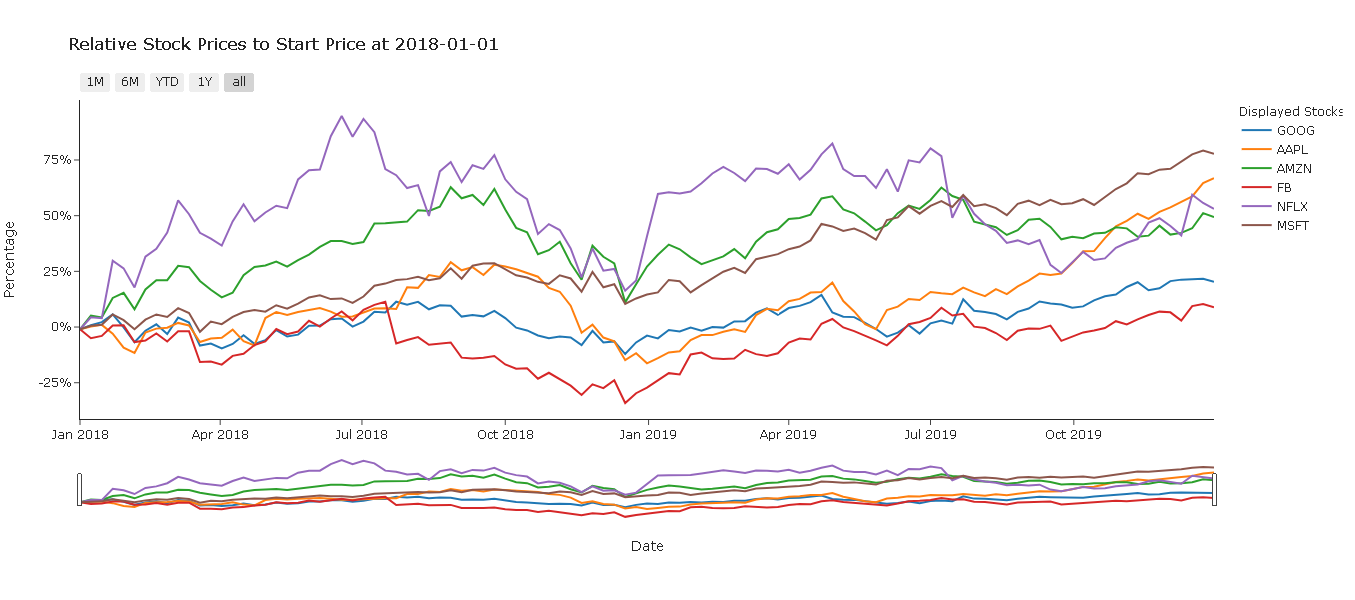

In [23]:
fig = go.Figure()

for col in stocks.columns[1:]:
    fig.add_trace(
        go.Scatter(
            x=stocks['date'],
            y=stocks[col]-1,
            name=col,
            mode='lines'
        )
    )

fig.update_layout(
    template='simple_white',
    title='Relative Stock Prices to Start Price at {}'.format(
        stocks['date'].min(), 
        stocks['date'].max()
    ),
    legend={'title':'Displayed Stocks'},
    height=600, width=1000
)

fig.update_xaxes(
    title_text = 'Date',
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = '1M', step = 'month', stepmode = 'backward'),
            dict(count = 6, label = '6M', step = 'month', stepmode = 'backward'),
            dict(count = 1, label = 'YTD', step = 'year', stepmode = 'todate'),
            dict(count = 1, label = '1Y', step = 'year', stepmode = 'backward'),
            dict(step = 'all')]
        )
    )
)

y_tickvalues=np.arange(-50, 100, 25)
fig.update_yaxes(
    title='Percentage',
    tickvals=y_tickvalues,
    ticktext =[str(i)+'%' for i in y_tickvalues]
)

fig.show()

## Scatterplot with Voronoi Hovering

In [97]:
from sklearn.decomposition import PCA

In [ ]:
stocks = stocks.set_index('date')
stocks.index = pd.to_datetime(stocks.index)

In [99]:
# Fitting PCA with 2 Components
model = PCA(n_components=2)
model.fit(stocks)
model.components_

array([[ 0.2135514 ,  0.52442194,  0.37448003,  0.19733538,  0.21607475,
         0.67343343],
       [ 0.05661248,  0.23604891, -0.2816013 , -0.03357897, -0.89305459,
         0.2512023 ]])

In [83]:
stocks_resampled = stocks.resample('1M').mean()

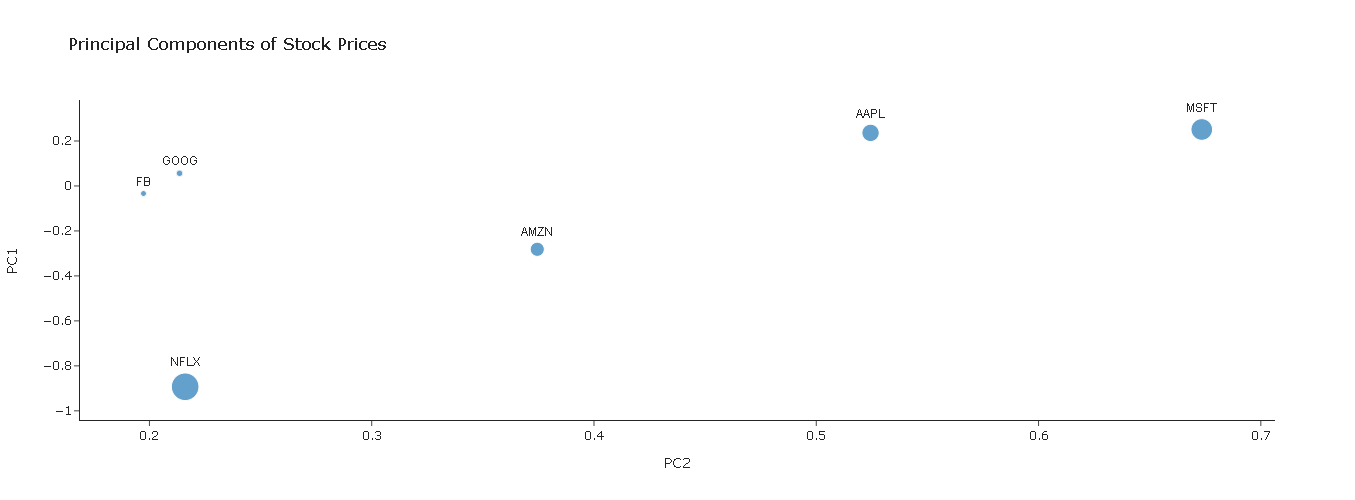

In [135]:
fig = go.Figure(
        go.Scatter(
            x=model.components_[0],
            y=model.components_[1],
            mode='markers+text', 
            marker=dict(size=30*np.sqrt(model.components_[0]**2+model.components_[1]**2)),
            text=stocks.columns, 
            textposition='top center',
            textfont=dict(family="arial",
                          size=12
                          )
    )
)

fig.update_layout(
    template='simple_white',
    title=r'Principal Components of Stock Prices',
    height=500, width=500,
    xaxis_title="PC2 ",
    yaxis_title="PC1",
)
    
fig.update_xaxes(showspikes=True, 
                 spikecolor="grey", 
                 spikesnap="data", 
                 spikethickness=1
                )
fig.update_yaxes(showspikes=True, 
                 spikecolor="grey", 
                 spikethickness=1
                )
fig.update_layout(spikedistance=1000, 
                  hoverdistance=100, 
                  hovermode="closest"
                 )
fig.show()